# Análisis Integral de ETSA en el Mercado Eléctrico Chileno

## 1. Objetivo

Profundizar en el entendimiento de ETSA, una empresa clave en el mercado eléctrico chileno, a través de un análisis de su actividad de peajes y su interacción con las empresas generadoras, teniendo en cuenta el contexto regulatorio y de mercado.

## 2. Datos Disponibles (Enero 2021 - Diciembre 2023)

* Pagos de Peajes a ETSA por Empresas Generadoras: Incluye datos detallados de pagos realizados a ETSA.
* Estructura de los Datos: El 'PagoTotal' representa la suma de 'PeajeInyección', 'PeajeRetiro' y 'PagoExención'. 'Periodo' indica la fecha en que se realizó el pago del peaje.

## 3. Análisis Propuesto

**3.1. Función y Rol de ETSA en el Mercado Eléctrico**

* Exploración del papel de ETSA en el mercado eléctrico, su importancia y sus responsabilidades.
* Interacción de ETSA con empresas generadoras y otros actores del mercado.

**3.2. Influencia de Cambios Regulatorios y del Mercado**

* Análisis del impacto de cambios regulatorios, como la Ley 21.400, en las operaciones de ETSA.
* Evaluación de cómo las variaciones en las tarifas de peajes y eventos del mercado afectan a ETSA.

**3.3. Análisis de Pagos de Peajes**

* Estudio estadístico de los pagos de peajes a ETSA, identificando tendencias y correlaciones.
* Interpretación de cómo las condiciones de mercado y regulatorias influyen en los pagos de peajes.

## 4. Resultados Esperados

* Comprensión detallada del papel y las dinámicas de ETSA en el mercado eléctrico chileno.
* Insights sobre las respuestas y adaptaciones de ETSA ante cambios en el entorno de mercado y regulatorio.
* Análisis detallado de los datos de peajes, revelando patrones y tendencias clave.

## 5. Importancia del Análisis

Este análisis proporcionará una visión completa de ETSA, destacando su impacto y adaptabilidad en un mercado eléctrico chileno en evolución. Será vital para comprender las interacciones entre las empresas de transmisión y otros participantes del mercado, así como las respuestas a los cambios regulatorios y de mercado.
cambios regulatorios y de mercado.
los cambios regulatorios y de mercado.


In [20]:
# Importación de bibliotecas para el manejo de datos, visualización y análisis estadístico

import pandas as pd

from sqlalchemy import create_engine

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.dates as mdates

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
def hist():
    server = 'WHJ1TN13\\SQLEXPRESS'
    database = 'i_rec'
    conexion_str = f'mssql+pyodbc://{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes'

    try:
        with create_engine(conexion_str).connect() as conn:
            consulta_sql = "SELECT * FROM [i_rec].[dbo].[ETSA]"
            df = pd.read_sql(consulta_sql, conn)

            df['Periodo'] = pd.to_datetime(df['Periodo'])

            df['Empresa Generación'] = df['Empresa Generación'].astype(str)

            columnas_monetarias = ['PagoTotal', 'PeajeInyección', 'PeajeRetiro', 'PagoExención']
            for columna in columnas_monetarias:
                df[columna] = df[columna].astype(float)

        return df

    except Exception as e:
        print("Error en la conexión o ejecución de la consulta:", e)
        return None


df = hist()
if df is not None:
    # display(df.head()) 
    pass

In [3]:
def agregar_y_procesar_por_periodo(df):
    df_agregado = df.groupby('Periodo').agg({
        'PagoTotal': 'sum',
        'PeajeInyección': 'sum',
        'PeajeRetiro': 'sum',
        'PagoExención': 'sum'
    }).reset_index()

    df_agregado['PagoTotal'] = df_agregado['PagoTotal'].div(1000000).round(1)
    df_agregado['PeajeInyección'] = df_agregado['PeajeInyección'].div(1000000).round(1)
    df_agregado['PeajeRetiro'] = df_agregado['PeajeRetiro'].div(1000000).round(1)
    df_agregado['PagoExención'] = df_agregado['PagoExención'].div(1000000).round(1)

    return df_agregado


df = hist()

if df is not None:
    df_procesado = agregar_y_procesar_por_periodo(df)
    # display(df_procesado.head())
    pass

## Análisis Exploratorio

In [4]:
# Análisis descriptivo
descriptive_stats = df_procesado.drop("Periodo", axis=1).describe()
descriptive_stats = descriptive_stats.round(1)
display(descriptive_stats)

,PagoTotal,PeajeInyección,PeajeRetiro,PagoExención
count,36.0,36.0,36.0,36.0
mean,71.8,39.3,29.1,3.4
std,18.1,11.1,9.8,0.6
min,39.2,19.6,17.8,1.8
25%,54.6,29.0,21.5,3.1
50%,76.7,39.0,28.2,3.7
75%,89.1,48.6,32.7,3.8
max,96.4,60.4,52.5,4.5


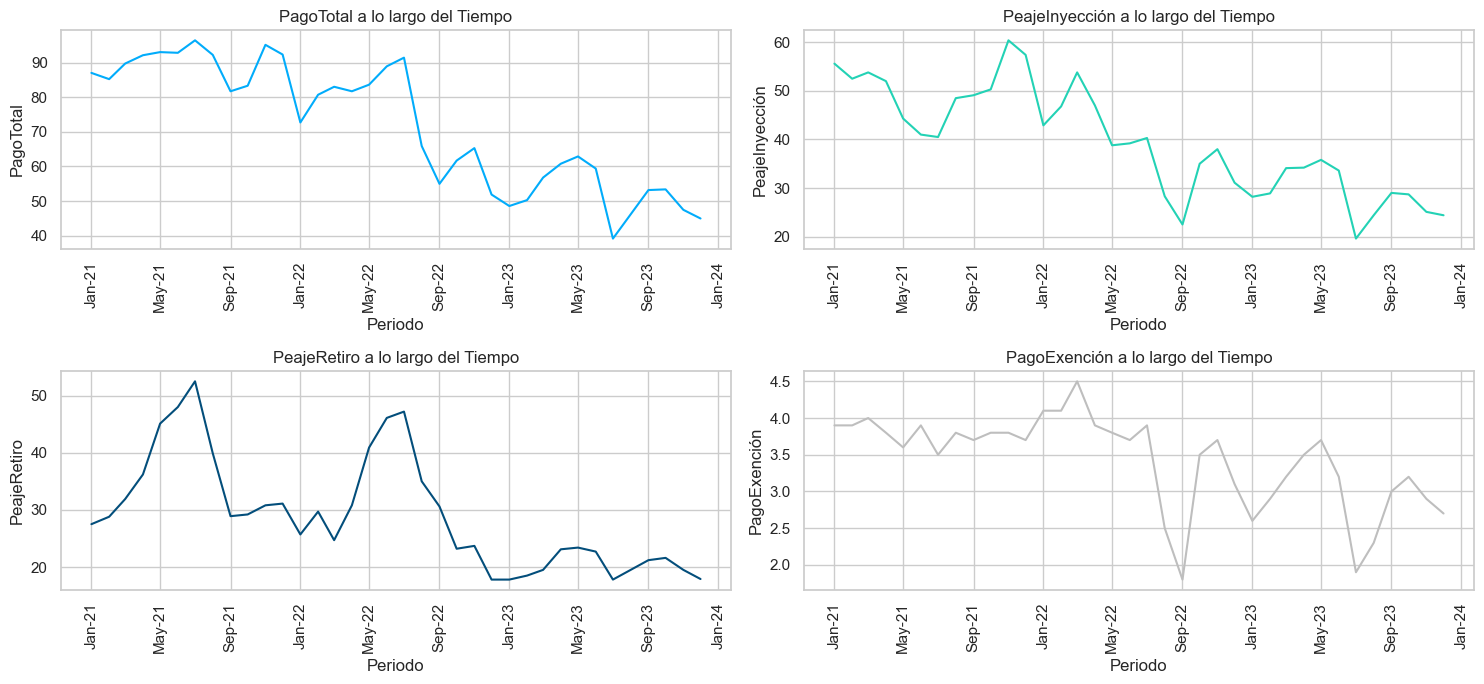

In [5]:
sns.set(style="whitegrid")

if 'Periodo' in df_procesado.columns:
    df_procesado['Periodo'] = pd.to_datetime(df_procesado['Periodo'])
    df_procesado.set_index('Periodo', inplace=True)

plt.figure(figsize=(15, 7))

columnas = ['PagoTotal', 'PeajeInyección', 'PeajeRetiro', 'PagoExención']
# Utilizando cuatro colores de la paleta previamente definida
colores = ["#01ACFB", "#23D2B5", "#034E7B", "#BEBEBE"]

for i, (columna, color) in enumerate(zip(columnas, colores), 1):
    ax = plt.subplot(2, 2, i)
    sns.lineplot(data=df_procesado, x=df_procesado.index, y=columna, color=color)
    plt.title(f'{columna} a lo largo del Tiempo')
    plt.xlabel('Periodo')
    plt.ylabel(columna)

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

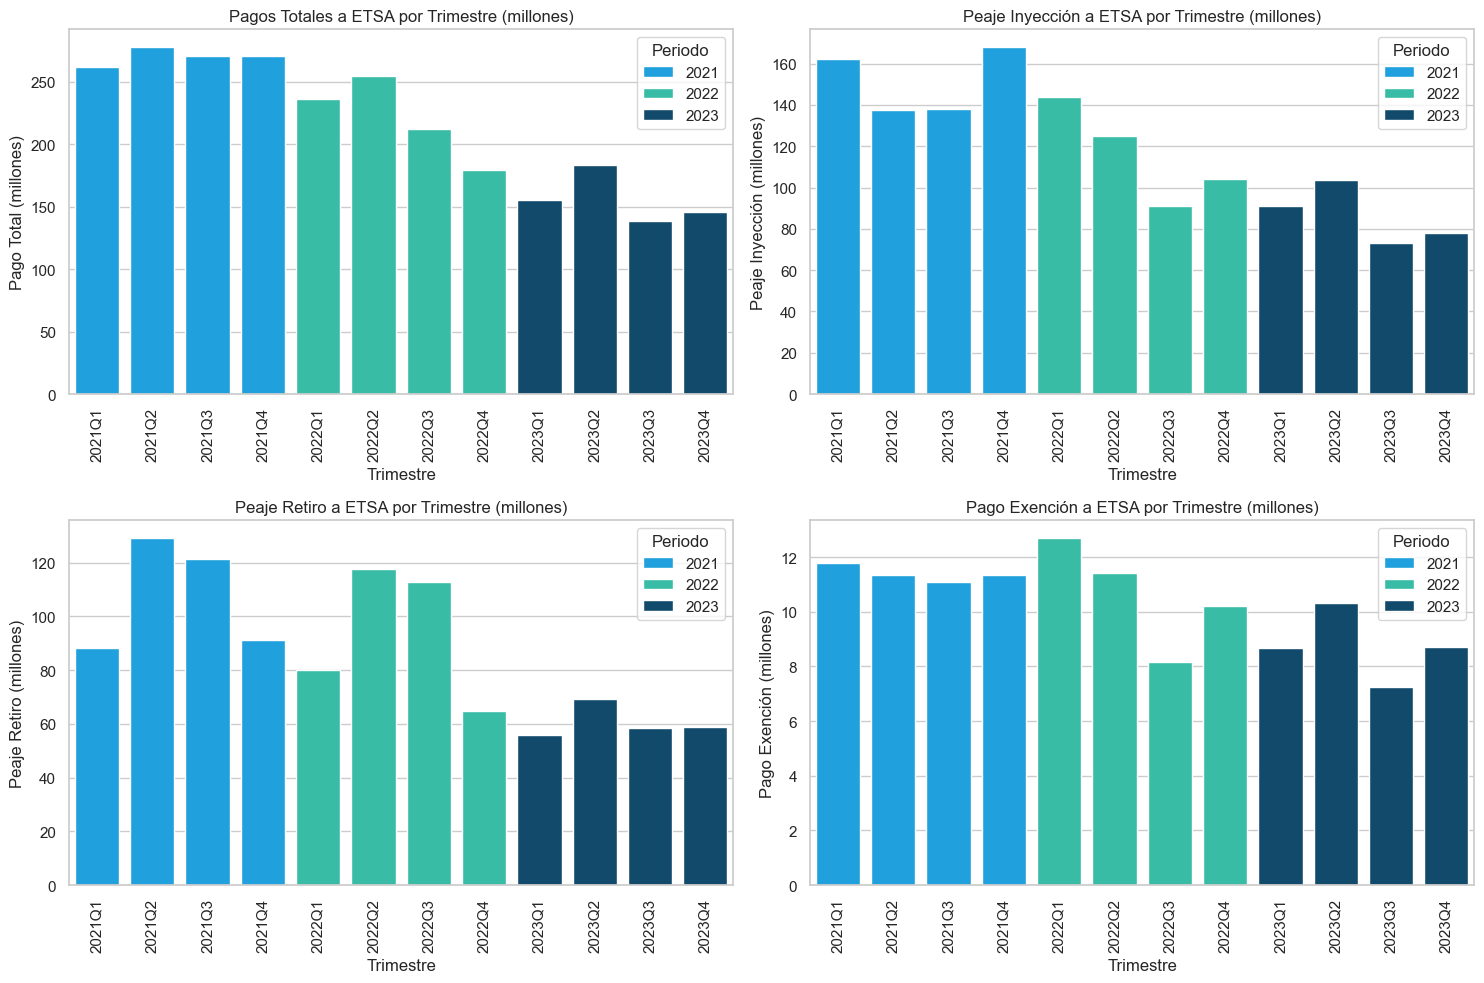

In [6]:
df['Periodo'] = pd.to_datetime(df['Periodo'])
df['Trimestre'] = df['Periodo'].dt.to_period('Q')

# Agrupar los datos por año y trimestre y sumar los diferentes tipos de pagos
quarterly_payment_summary = df.groupby([df['Periodo'].dt.year, 'Trimestre']).agg({
    'PagoTotal': 'sum',
    'PeajeInyección': 'sum',
    'PeajeRetiro': 'sum',
    'PagoExención': 'sum'
}).reset_index()

# Ajustar los valores a millones
quarterly_payment_summary[['PagoTotal', 'PeajeInyección', 'PeajeRetiro', 'PagoExención']] /= 1_000_000

# Definiendo la paleta de colores
palette_colors = ["#01ACFB", "#23D2B5", "#034E7B"]

# Visualización de las tendencias trimestrales de los diferentes tipos de pagos en millones
plt.figure(figsize=(15, 10))

# Pagos Totales
plt.subplot(2, 2, 1)
sns.barplot(x='Trimestre', y='PagoTotal', hue='Periodo', data=quarterly_payment_summary, palette=palette_colors)
plt.title('Pagos Totales a ETSA por Trimestre (millones)')
plt.ylabel('Pago Total (millones)')
plt.xticks(rotation=90)

# Peaje Inyección
plt.subplot(2, 2, 2)
sns.barplot(x='Trimestre', y='PeajeInyección', hue='Periodo', data=quarterly_payment_summary, palette=palette_colors)
plt.title('Peaje Inyección a ETSA por Trimestre (millones)')
plt.ylabel('Peaje Inyección (millones)')
plt.xticks(rotation=90)

# Peaje Retiro
plt.subplot(2, 2, 3)
sns.barplot(x='Trimestre', y='PeajeRetiro', hue='Periodo', data=quarterly_payment_summary, palette=palette_colors)
plt.title('Peaje Retiro a ETSA por Trimestre (millones)')
plt.ylabel('Peaje Retiro (millones)')
plt.xticks(rotation=90)

# Pago Exención
plt.subplot(2, 2, 4)
sns.barplot(x='Trimestre', y='PagoExención', hue='Periodo', data=quarterly_payment_summary, palette=palette_colors)
plt.title('Pago Exención a ETSA por Trimestre (millones)')
plt.ylabel('Pago Exención (millones)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


## Análisis de Estacionalidad 

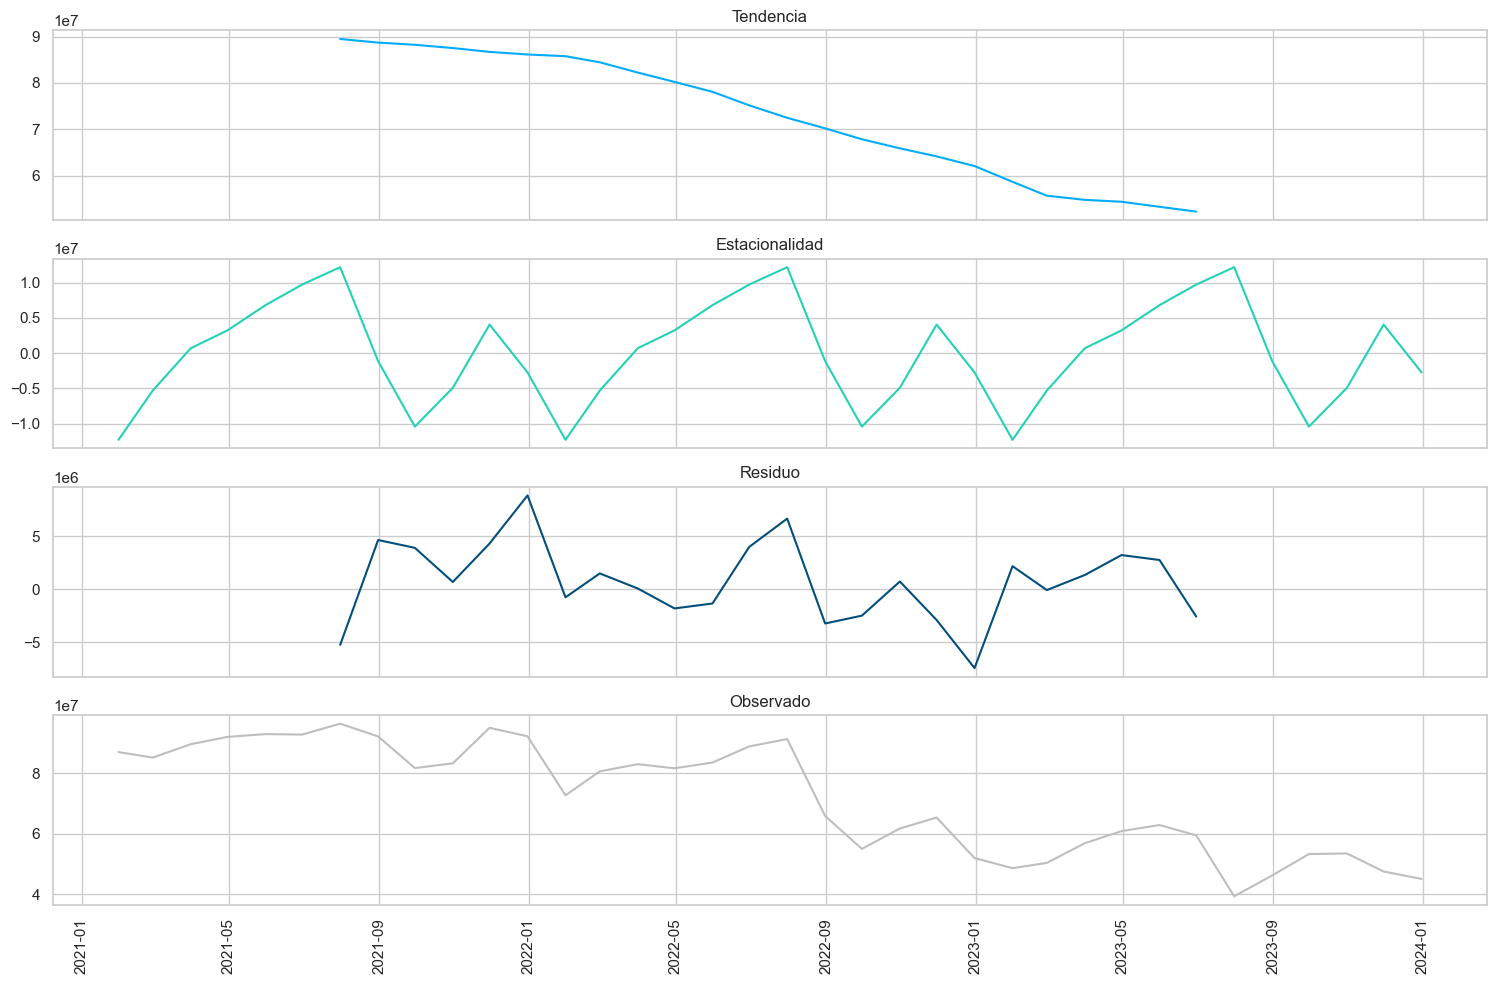

In [13]:
if 'Periodo' in df.columns:
    df['Periodo'] = pd.to_datetime(df['Periodo'])
    df.set_index('Periodo', inplace=True)
elif not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index)

# Agrupando los datos por mes y sumando los PagosTotales
monthly_payments = df['PagoTotal'].resample('M').sum()

# Descomposición de la serie temporal en tendencia, estacionalidad y residuo
decomposition = sm.tsa.seasonal_decompose(monthly_payments, model='additive')

# Configuración de Seaborn para mejorar la estética del gráfico
sns.set(style="whitegrid")

# Colores para cada subgráfico
colores = ["#01ACFB", "#23D2B5", "#034E7B", "#BEBEBE"]

# Visualización de la descomposición
fig, axes = plt.subplots(4, 1, figsize=(15, 10), sharex=True)

# Tendencia
axes[0].plot(decomposition.trend, color=colores[0])
axes[0].set_title('Tendencia')
axes[0].tick_params(axis='x', rotation=90)

# Estacionalidad
axes[1].plot(decomposition.seasonal, color=colores[1])
axes[1].set_title('Estacionalidad')
axes[1].tick_params(axis='x', rotation=90)

# Residuo
axes[2].plot(decomposition.resid, color=colores[2])
axes[2].set_title('Residuo')
axes[2].tick_params(axis='x', rotation=90)

# Observado
axes[3].plot(decomposition.observed, color=colores[3])
axes[3].set_title('Observado')
axes[3].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [8]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
observed = decomposition.observed

decomposition_df = pd.DataFrame({
    'Tendencia': trend,
    'Estacionalidad': seasonal,
    'Residuo': residual,
    'Observado': observed
})

print(decomposition_df.head())

            Tendencia  Estacionalidad  Residuo     Observado
Periodo                                                     
2021-01-31        NaN   -1.229515e+07      NaN  8.703095e+07
2021-02-28        NaN   -5.298539e+06      NaN  8.520740e+07
2021-03-31        NaN    7.037766e+05      NaN  8.965004e+07
2021-04-30        NaN    3.240120e+06      NaN  9.205612e+07
2021-05-31        NaN    6.818850e+06      NaN  9.299278e+07


## Análisis de Regresión

In [10]:
df_regresion = df.dropna(subset=['PagoTotal', 'PeajeInyección', 'PeajeRetiro', 'PagoExención'])

X = df_regresion[['PeajeInyección', 'PeajeRetiro', 'PagoExención']]
y = df_regresion['PagoTotal']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

modelo = LinearRegression()

modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio: {mse}")
print(f"Coeficiente de determinación R^2: {r2}")

Error cuadrático medio: 9.335064246480616e-10
Coeficiente de determinación R^2: 1.0


In [15]:
scores = cross_val_score(modelo, X, y, cv=5, scoring='neg_mean_squared_error')

mse_scores = -scores
mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

print(f"Error cuadrático medio promedio: {mean_mse}")
print(f"Desviación estándar del MSE: {std_mse}")

Error cuadrático medio promedio: 1.1348686588575602e-09
Desviación estándar del MSE: 6.099719348749676e-11


In [18]:
modelo_ridge = Ridge(alpha=1.0)

scores_ridge = cross_val_score(modelo_ridge, X, y, cv=5, scoring='neg_mean_squared_error')

mse_scores_ridge = -scores_ridge
mean_mse_ridge = mse_scores_ridge.mean()
std_mse_ridge = mse_scores_ridge.std()

print(f"Ridge - Error cuadrático medio promedio: {mean_mse_ridge}")
print(f"Ridge - Desviación estándar del MSE: {std_mse_ridge}")

Ridge - Error cuadrático medio promedio: 1.134880570699245e-09
Ridge - Desviación estándar del MSE: 6.10165540529224e-11


In [21]:
modelo_lasso = Lasso(alpha=0.1) 

scores_lasso = cross_val_score(modelo_lasso, X, y, cv=5, scoring='neg_mean_squared_error')

mse_scores_lasso = -scores_lasso
mean_mse_lasso = mse_scores_lasso.mean()
std_mse_lasso = mse_scores_lasso.std()

print(f"Lasso - Error cuadrático medio promedio: {mean_mse_lasso}")
print(f"Lasso - Desviación estándar del MSE: {std_mse_lasso}")

Lasso - Error cuadrático medio promedio: 4437.742818930876
Lasso - Desviación estándar del MSE: 4227.24733207633


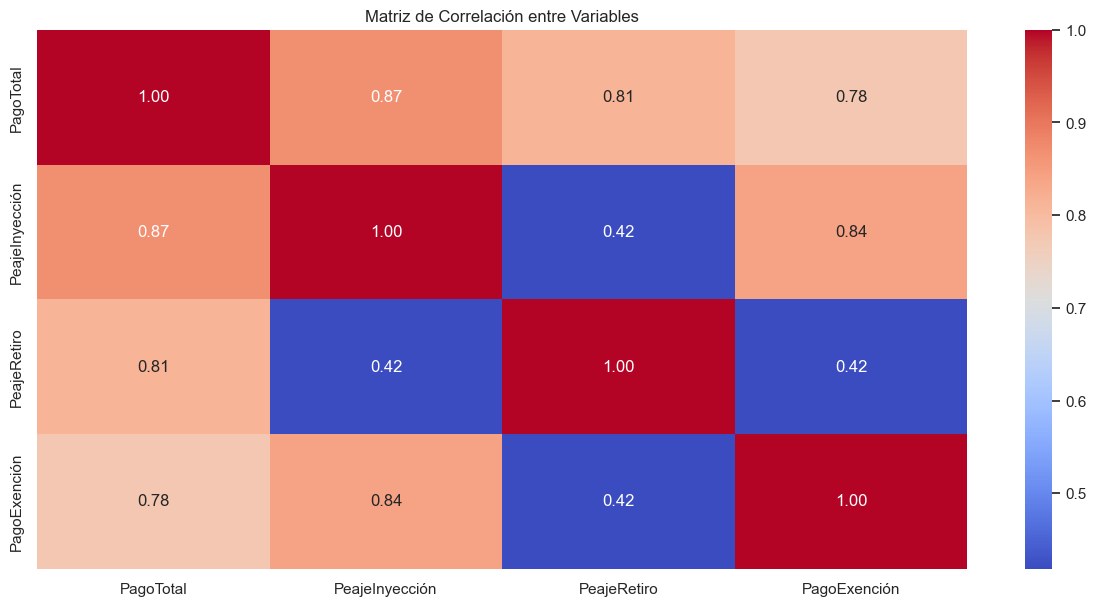

                PagoTotal  PeajeInyección  PeajeRetiro  PagoExención
PagoTotal        1.000000        0.870018     0.812363      0.775393
PeajeInyección   0.870018        1.000000     0.419717      0.839067
PeajeRetiro      0.812363        0.419717     1.000000      0.418415
PagoExención     0.775393        0.839067     0.418415      1.000000


In [25]:
matriz_correlacion = df_procesado.corr()

plt.figure(figsize=(15, 7))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlación entre Variables")
plt.show()
print(matriz_correlacion)

### Evolución de los factores que afectan los pagos de peajes de transmisión en Chile

**2021**

* **Precios de la energía:** Aumento del 3,1%. Podría reflejarse en mayores costos para las empresas generadoras, lo que podría influir en sus decisiones operativas y los pagos de peajes.
* **Demanda de energía:** 73,3 TWh. Podría llevar a un mayor uso de la infraestructura de red y, por lo tanto, a un aumento en los pagos de peajes.
* **Capacidad instalada y producción:** 25,8 GW. Podría ayudar a satisfacer la demanda y, por ende, a reducir los pagos de peajes.
* **Políticas y regulaciones:** Revisión tarifaria 2021-2023. Podría tener un impacto directo en los costos de transmisión y, por lo tanto, en los pagos de peajes.
* **Eventos económicos y climáticos:** Crisis hídrica. Podría haber afectado la producción de energía hidroeléctrica, lo que podría influir en los patrones de peajes.
* **Inversiones en infraestructura de red:** 1.500 millones de dólares. Podrían ayudar a reducir los costos de transmisión.
* **Datos financieros:** Aumento del 12% en el EBITDA de las empresas de generación. Podría estar relacionado con la estructura de costos y los pagos de peajes.

**2022**

* **Precios de la energía:** Aumento del 20%. Podría ejercer una presión significativa sobre las empresas generadoras y los pagos de peajes.
* **Demanda de energía:** 76,1 TWh. Podría seguir aumentando los pagos de peajes.
* **Políticas y regulaciones:** Revisión extraordinaria de los peajes de transmisión 2022-2024. Podría haber llevado a ajustes significativos en los costos de peajes.
* **Eventos climáticos:** Continuación de la crisis hídrica. Podría haber seguido afectando la producción de energía hidroeléctrica.

**2023**

* **Precios de la energía:** Disminución del 10%. Podría aliviar los costos para las empresas generadoras y los pagos de peajes.
* **Demanda de energía:** Aumento significativo a 123,1 TWh. Podría haber llevado a un incremento en los pagos de peajes.
* **Políticas y regulaciones:** Reforma al mercado eléctrico. Podría tener un impacto sustancial en la estructura del mercado y los costos de transmisión.



## Función y Rol de ETSA en el Mercado Eléctrico